# STEP 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# STEP 2: Load Dataset

In [5]:
df = pd.read_csv("Dataset/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data set
1. CustomerID -> identifier (primary key )
2. Gender -> categorical data
3. Age -> numeric, behavior-related
4. Income -> numeric, economic indicator
5. Spending Score -> numeric, behavioral indicator

In [20]:
df.shape # Dataset size sanity check


(200, 5)

In [21]:
df.info() # Check structure & data types


<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


### Identification:
 - Dataset has 200 rows, 5 columns
 - No missing values
 - Mix of categorical + numerical data

# STEP 3: Basic EDA (Exploratory Data Analysis)

In [22]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='str')

### Data set
1. CustomerID -> identifier (primary key )
2. Gender -> categorical data
3. [ ] Age -> numeric, behavior-related
4. [ ] Income -> numeric, economic indicator
5. [ ] Spending Score -> numeric, behavioral indicator

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Identification

Age varies widely -> clustering possible

Income & spending have different ranges -> scaling required

In [25]:
df['Age'].describe()


count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

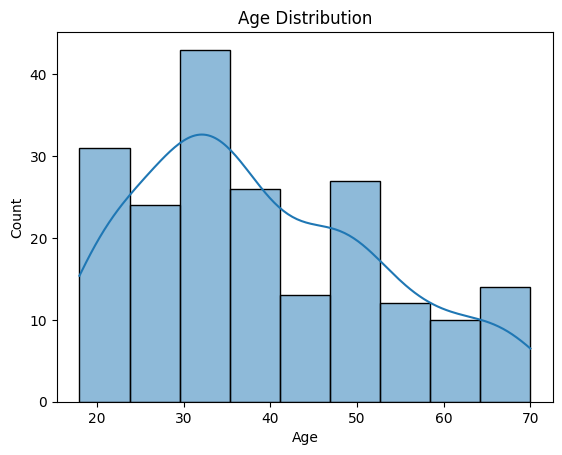

In [14]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

### Observation :

Min ≠ Max by a lot -> wide age range

Std not small -> people are not same age

- Customers belong to multiple age groups rather than a single age band.

In [24]:
df['Annual Income (k$)'].describe()


count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

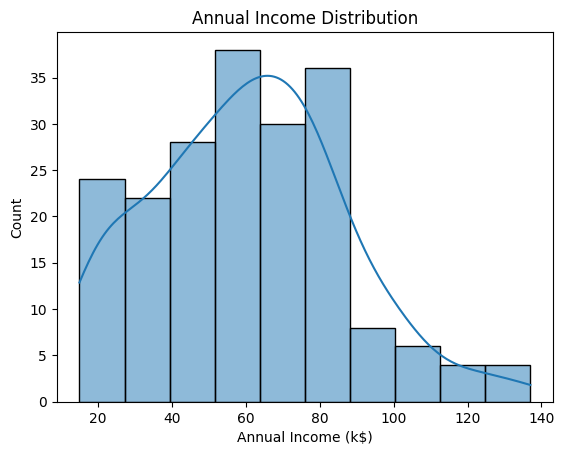

In [15]:
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()


### Observation:

Income varies 9× from min to max

Std is large → economic diversity

- Customers have significantly different income levels.
- More people in mid-income range
- Fewer high-income customers

In [28]:
df['Spending Score (1-100)'].describe()


count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

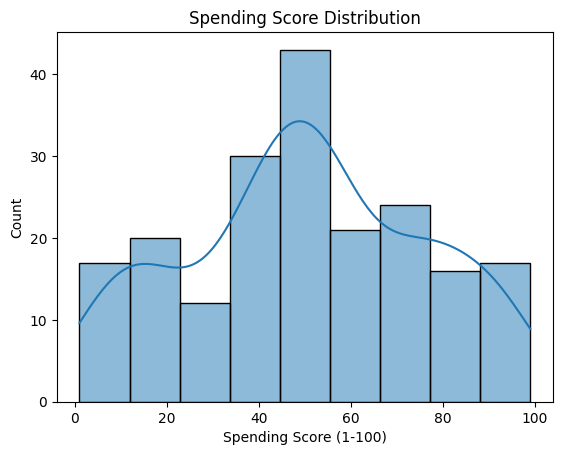

In [16]:
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()


### Observation:
No single dominant spending level

Low, medium, high spenders exist

- Spending behavior varies significantly among customers.

## Final Observations:
- Age: Customers span multiple age groups with a concentration in the middle-age range.

- Income: Annual income shows high variability, reflecting diverse economic backgrounds.

- Spending Score: Spending behavior is widely distributed, making it suitable for customer segmentation.


# Step 4: Relationship Analysis 

### (Income vs Spending)

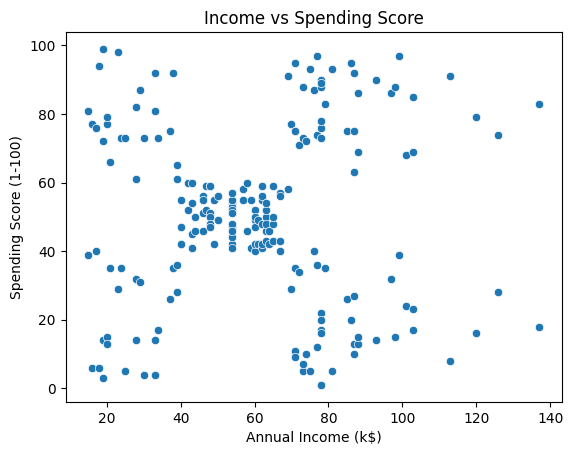

In [31]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


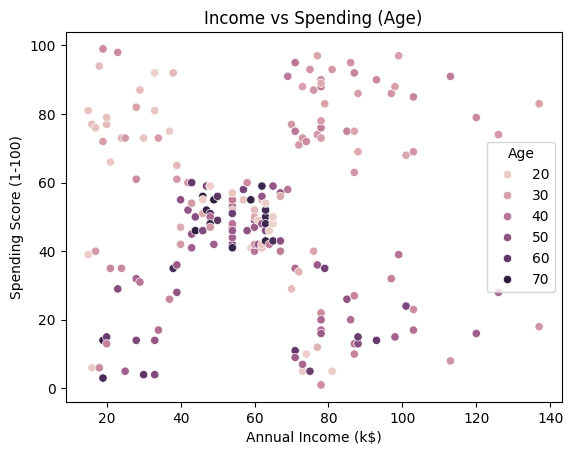

In [34]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Age',
    data=df
)
plt.title("Income vs Spending (Age)")
plt.show()


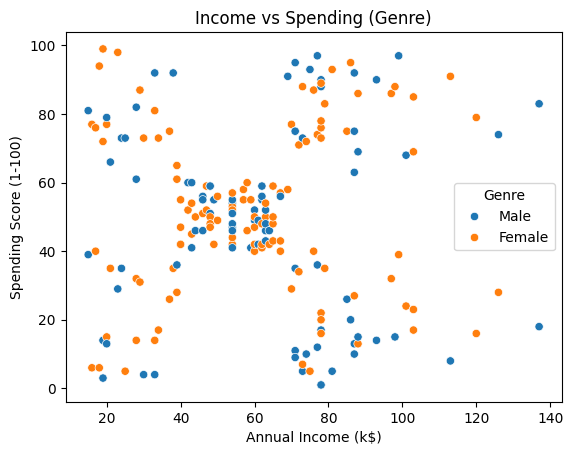

In [36]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Genre',
    data=df
)
plt.title("Income vs Spending (Genre)")
plt.show()


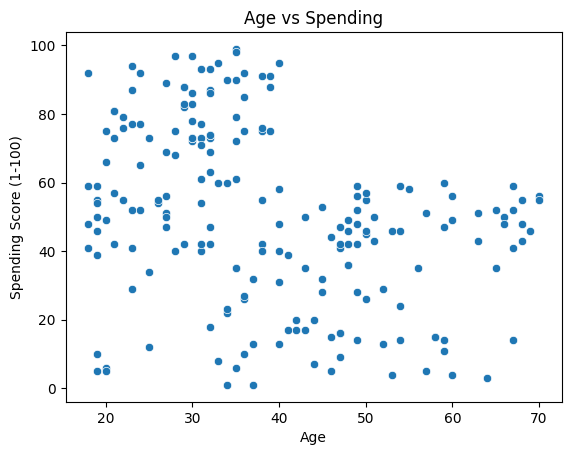

In [41]:
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Age vs Spending")
plt.show()


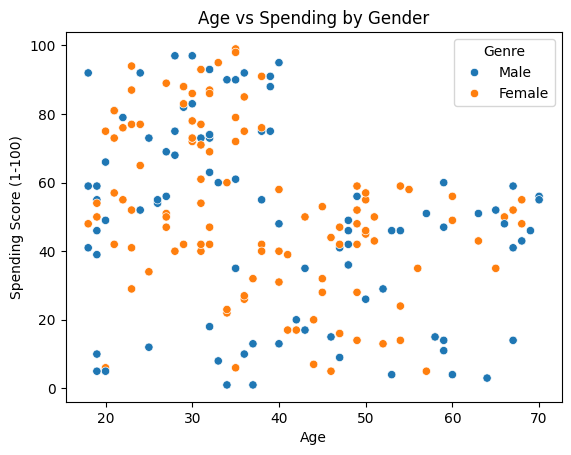

In [38]:
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    hue='Genre',
    data=df
)
plt.title("Age vs Spending by Gender")
plt.show()


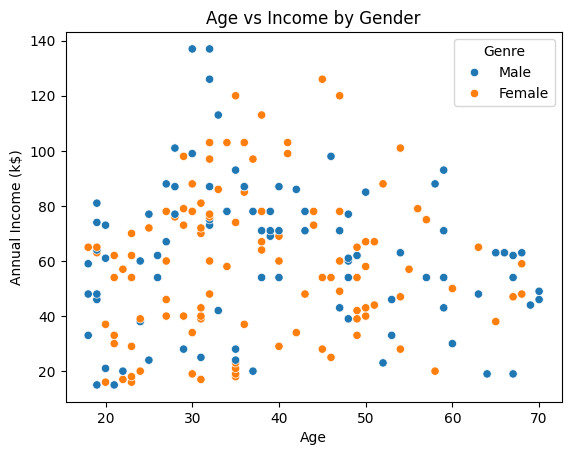

In [40]:
sns.scatterplot(
    x='Age',
    y='Annual Income (k$)',
    hue='Genre',
    data=df
)
plt.title("Age vs Income by Gender")
plt.show()


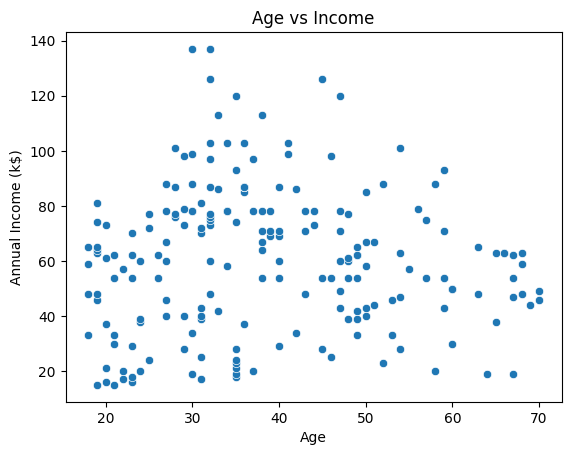

In [42]:
sns.scatterplot(
    x='Age',
    y='Annual Income (k$)',
    data=df
)
plt.title("Age vs Income")
plt.show()


In [43]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


- -0.3 to +0.3 → weak / almost none
- |0.7| → strong

Customers with similar income show different spending behavior, so grouping them makes sense.

# Step 5 :FEATURE SELECTION & PREPROCESSING

In [45]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='str')

In [46]:
df_model = df.drop(['CustomerID'], axis=1)


In [47]:
df_model.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [50]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['Genre'] = le.fit_transform(df_model['Genre'])


In [52]:
df_model.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [54]:
X = df_model[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']]

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_scaled[1]

array([-1.28103541, -1.73899919,  1.19570407,  1.12815215])

# Step 6: K-MEANS CLUSTERING

### Elbow Method

In [60]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [67]:
for i,j in enumerate(wcss):
    print(i,'->',j)

0 -> 800.0
1 -> 597.947293793228
2 -> 494.8037500130458
3 -> 395.3920903479796
4 -> 351.74320617119105
5 -> 277.38974019851906
6 -> 251.15484911190177
7 -> 211.98576294959307
8 -> 185.72807688711416
9 -> 152.0298342977569


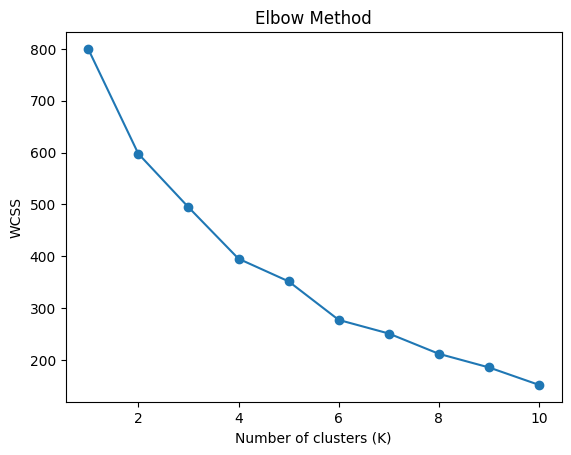

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [69]:
df_model['KMeans_Cluster'] = clusters


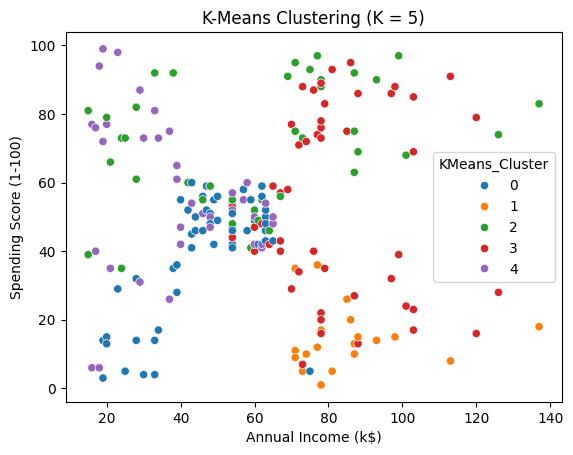

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=df_model['Annual Income (k$)'],
    y=df_model['Spending Score (1-100)'],
    hue=df_model['KMeans_Cluster'],
    palette='tab10'
)
plt.title("K-Means Clustering (K = 5)")
plt.show()


In [71]:
df_model.groupby('KMeans_Cluster').mean()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,,
0,0.509804,56.470588,46.098039,39.313725
1,1.000000,39.500000,85.150000,14.050000
2,1.000000,28.690476,60.904762,70.238095
3,0.000000,37.897959,82.122449,54.448980
4,0.000000,27.315789,38.842105,56.210526


| Income | Spending | Meaning   |
| ------ | -------- | --------- |
| High   | Low      | Cluster 1 |
| High   | High     | Cluster 3 |
| Low    | High     | Cluster 4 |
| Low    | Low      | Cluster 0 |


In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


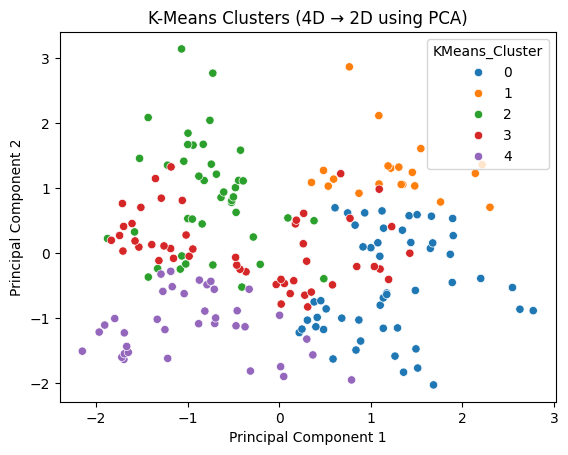

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_model['KMeans_Cluster'],
    palette='tab10'
)
plt.title("K-Means Clusters (4D → 2D using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [74]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)


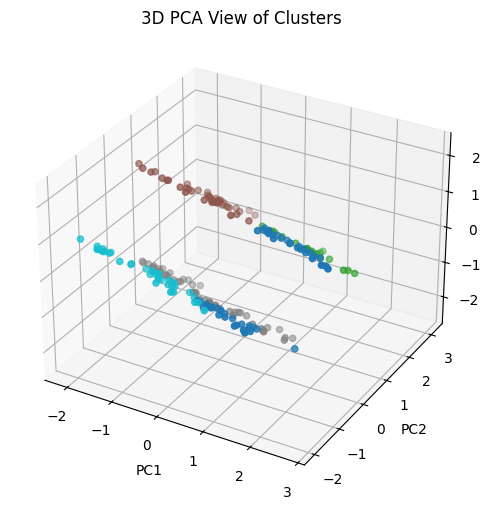

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_pca3[:, 0],
    X_pca3[:, 1],
    X_pca3[:, 2],
    c=df_model['KMeans_Cluster'],
    cmap='tab10'
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA View of Clusters")
plt.show()


# Step 7: SILHOUETTE SCORE

In [76]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df_model['KMeans_Cluster'])
sil_score


0.2719102346618833

In [77]:
sil_scores = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

sil_scores


[0.2776035125578273,
 0.2576199805135528,
 0.29010917402310876,
 0.2719102346618833,
 0.33475434756692174,
 0.34573978792577004,
 0.3727647594212929]

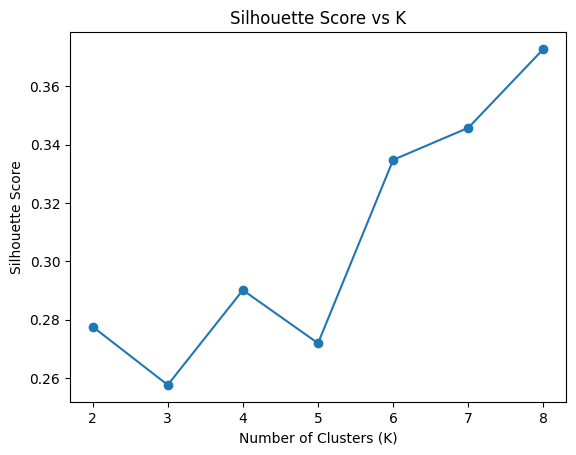

In [78]:
plt.plot(range(2, 9), sil_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.show()


In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [80]:
df_model['KMeans_Cluster'] = clusters


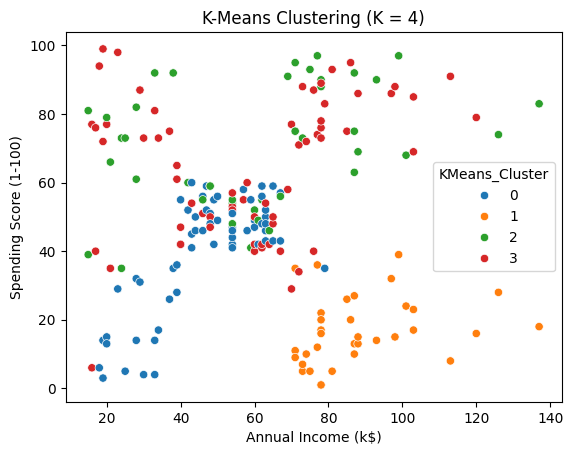

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=df_model['Annual Income (k$)'],
    y=df_model['Spending Score (1-100)'],
    hue=df_model['KMeans_Cluster'],
    palette='tab10'
)
plt.title("K-Means Clustering (K = 4)")
plt.show()


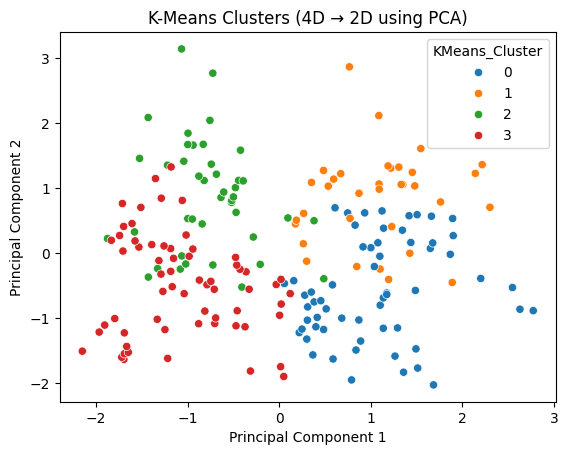

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df_model['KMeans_Cluster'],
    palette='tab10'
)
plt.title("K-Means Clusters (4D → 2D using PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Step 8: HIERARCHICAL CLUSTERING

### Dendrogram

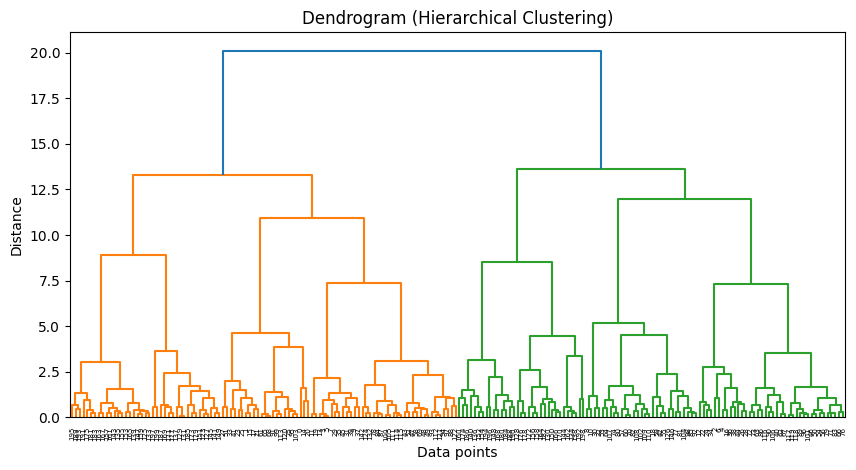

In [84]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()


In [85]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

df_model['HC_Cluster'] = hc_labels


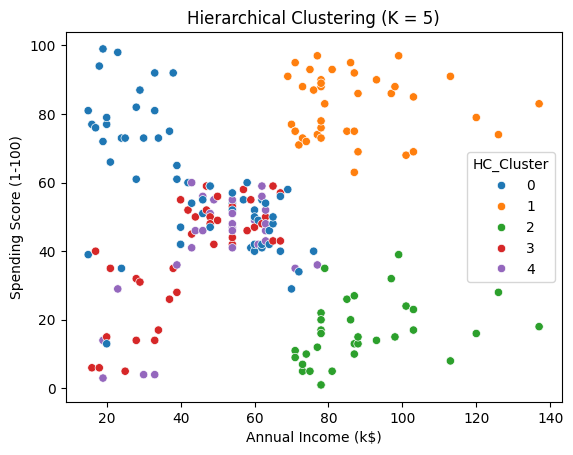

In [86]:
import seaborn as sns

sns.scatterplot(
    x=df_model['Annual Income (k$)'],
    y=df_model['Spending Score (1-100)'],
    hue=df_model['HC_Cluster'],
    palette='tab10'
)
plt.title("Hierarchical Clustering (K = 5)")
plt.show()


In [87]:
from sklearn.metrics import silhouette_score

sil_hc = silhouette_score(X_scaled, hc_labels)
sil_hc


0.28699413201651747

# Step 9: DBSCAN

In [88]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df_model['DBSCAN_Cluster'] = db_labels


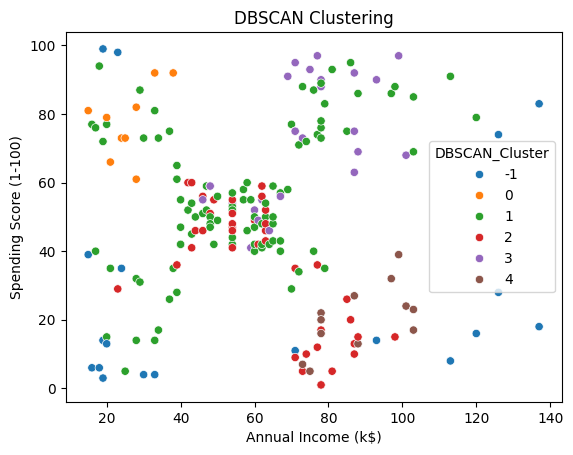

In [89]:
sns.scatterplot(
    x=df_model['Annual Income (k$)'],
    y=df_model['Spending Score (1-100)'],
    hue=df_model['DBSCAN_Cluster'],
    palette='tab10'
)
plt.title("DBSCAN Clustering")
plt.show()


In [90]:
import numpy as np

mask = db_labels != -1

if len(set(db_labels[mask])) > 1:
    sil_db = silhouette_score(X_scaled[mask], db_labels[mask])
else:
    sil_db = None

sil_db


0.22725989493491877

In [91]:
comparison = {
    "K-Means": sil_score,   # from Phase 6
    "Hierarchical": sil_hc,
    "DBSCAN": sil_db
}

comparison


{'K-Means': 0.2719102346618833,
 'Hierarchical': 0.28699413201651747,
 'DBSCAN': 0.22725989493491877}

In [92]:
import pandas as pd

pd.DataFrame.from_dict(
    comparison, orient='index', columns=['Silhouette Score']
)


,Silhouette Score
K-Means,0.271910
Hierarchical,0.286994
DBSCAN,0.227260


# Conclusion: 

Hierarchical clustering achieved the highest silhouette score, indicating slightly better cluster separation. However, K-Means was selected as the final model due to its simplicity, interpretability, and comparable performance. DBSCAN was less suitable due to weaker density separation.

Hierarchical performed marginally better numerically, while K-Means offers a better balance between performance and interpretability. Therefore, K-Means is the recommended approach.

1. Cluster 1 – High-Income, Low-Spending Customers
    - Target with personalized premium offers to unlock high untapped revenue potential.

2. Cluster 2 – Young, High-Spending Customers
    - Use promotions, flash sales, and trend-driven campaigns to maximize purchase frequency.
      
3. Cluster 3 – High-Value Loyal Customers
    - Prioritize retention with VIP benefits, exclusive access, and personalized rewards.
      
4. Cluster 4 – Young, Impulsive Spenders
    - Drive volume using affordable bundles, discounts, and social-media-led marketing.